In [1]:
# Name: Laijun Xu

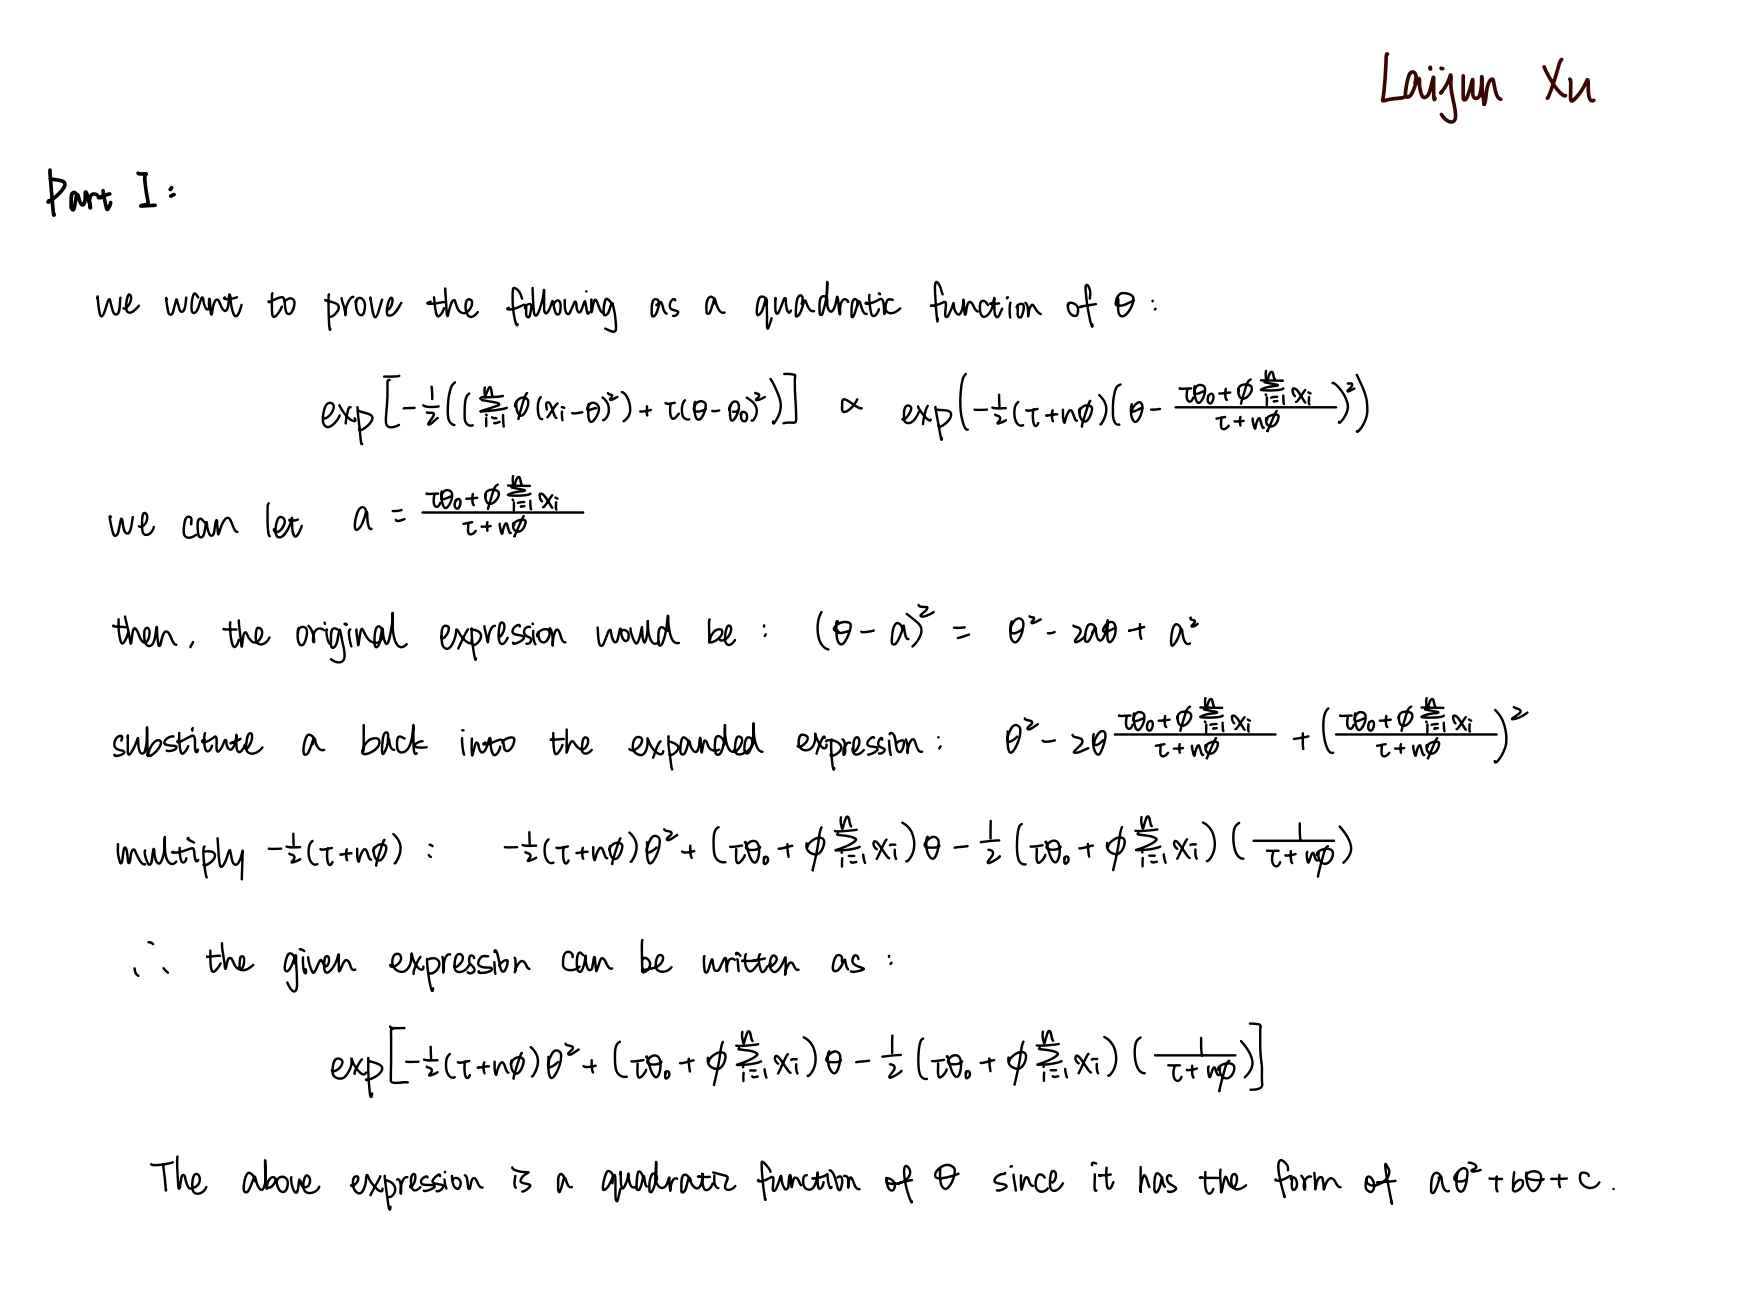

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

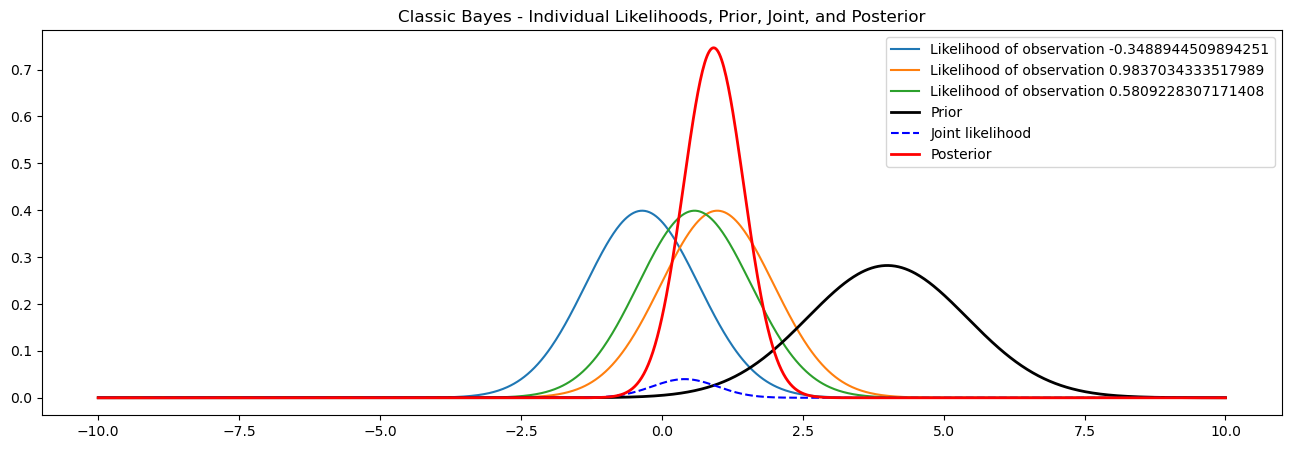

In [3]:
# 1.

# Set the random seed for reproducibility
np.random.seed(32)

# Given values from the previous context
n = 3  # number of observations
theta_0, tau = 4, 1/2  # prior distribution parameters
parameter_domain = np.linspace(-10, 10, 1001)  # domain for the parameter theta

# Generate n random samples from a normal distribution with mean 0 and std dev 1
x = stats.norm(loc=0, scale=1).rvs(n)

# Prior distribution as a normal distribution
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Calculate individual likelihoods, joint distribution, and posterior
individual_likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]
joint_likelihood = np.prod(individual_likelihoods, axis=0)  # Element-wise multiplication of likelihoods
posterior = joint_likelihood * prior  # The unnormalized posterior is the product of the joint likelihood and prior
posterior /= np.trapz(posterior, parameter_domain)  # Normalize the posterior

# Set up the plot
plt.figure(figsize=(16, 5))

# Plot individual likelihoods for each observation xi
for i, individual_likelihood in enumerate(individual_likelihoods):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {x[i]}")

# Plotting the prior, joint, and posterior
plt.plot(parameter_domain, prior, label="Prior", color='black', linewidth=2)
plt.plot(parameter_domain, joint_likelihood, label="Joint likelihood", color='blue', linestyle="--")
plt.plot(parameter_domain, posterior, label="Posterior", color='red', linewidth=2)

# Adding legend and title to the plot
plt.legend()
plt.title("Classic Bayes - Individual Likelihoods, Prior, Joint, and Posterior")

# Show the plot
plt.show()


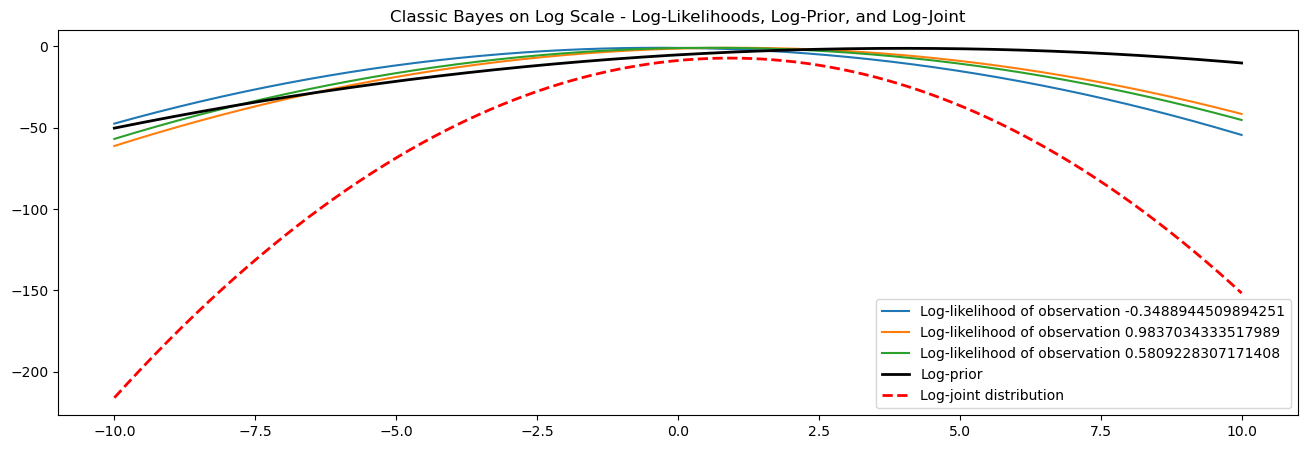

In [4]:
# 2.

# Set the random seed for reproducibility
np.random.seed(32)

# Given values from the previous context
n = 3  # number of observations
theta_0, tau = 4, 1/2  # prior distribution parameters
parameter_domain = np.linspace(-10, 10, 1001)  # domain for the parameter theta

# Generate n random samples from a normal distribution with mean 0 and std dev 1
x = stats.norm(loc=0, scale=1).rvs(n)

# Prior distribution as a normal distribution
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Calculate log-likelihood, log-prior, and log-joint distribution
log_likelihoods = [stats.norm.logpdf(parameter_domain, loc=xi, scale=1) for xi in x]
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)
log_joint = np.sum(log_likelihoods, axis=0) + log_prior  # Summing log-likelihoods and adding log-prior

# Set up the plot for log scale
plt.figure(figsize=(16, 5))

# Plot individual log-likelihoods for each observation xi
for i, log_likelihood in enumerate(log_likelihoods):
    plt.plot(parameter_domain, log_likelihood, label=f"Log-likelihood of observation {x[i]}")

# Plotting the log-prior
plt.plot(parameter_domain, log_prior, label="Log-prior", color='black', linewidth=2)

# Plotting the log-joint distribution
plt.plot(parameter_domain, log_joint, linestyle="--", label="Log-joint distribution", color='red', linewidth=2)

# Adding legend and title to the plot
plt.legend()
plt.title("Classic Bayes on Log Scale - Log-Likelihoods, Log-Prior, and Log-Joint")

# Show the plot
plt.show()



**3.**
When we have a normal likelihood function and a noninformative prior (where $p(\theta) \propto 1$), the posterior distribution is proportional to the likelihood function. This is because the prior does not contribute any additional information about the parameter values and acts as a constant factor in the Bayesian update formula.

In the case of normal data with a known variance, the likelihood function is also normal. Thus, with a noninformative prior, the posterior distribution will be a normal distribution centered at the sample mean with variance depending on the sample variance and the number of observations.

Mathematically, for a normal likelihood with mean $\mu$ and variance $\sigma^2$, the posterior distribution of $\theta$ given the data $x$ is:
$$
p(\theta|x) \propto \exp\left( -\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \theta)^2 \right)
$$

Here, $x_i$ are the observed data points, and $n$ is the number of observations. The sum of squared differences in the exponent is the essential part of the normal likelihood. Since the noninformative prior is constant, it does not alter the shape of the likelihood function, and the posterior distribution is simply the normalized version of the likelihood function.

Thus, the posterior mean $\hat{\theta}$ is the sample mean $\bar{x}$, and the posterior variance $\hat{\sigma}^2$ is $\sigma^2 / n$, where $\sigma^2$ is the known data variance.

So, the posterior distribution will be:
$$
\theta|x \sim \mathcal{N}(\bar{x}, \sigma^2/n)
$$

This reflects the fact that with more data (larger $n$), our posterior belief about $\theta$ becomes more concentrated around the sample mean with less variance, indicating increased certainty about the parameter's value.


**4.**
The difference between a log likelihood and a log posterior when an improper prior is used relates to the inclusion of the log of the marginal likelihood constant in the posterior.

The log likelihood, $\log p(x|\theta)$, describes the log probability of the observed data given a parameter value and does not depend on the prior. It remains unchanged regardless of the prior used.

The log posterior, $\log p(\theta|x)$, is the log probability of the parameter given the observed data. It is computed by adding the log likelihood and the log prior, and subtracting the log of the marginal likelihood (also known as the model evidence or normalizing constant). The formula for the log posterior is:

$$
\log p(\theta|x) = \log p(x|\theta) + \log p(\theta) - \log p(x)
$$

When an improper prior is used, which is a prior that cannot be normalized (i.e., does not integrate to one over the parameter space), it often takes the form of a constant. In such cases, $\log p(\theta)$ is a constant value, which when added to the log likelihood, shifts it by a constant amount but does not change its shape. The problematic part arises with the term $\log p(x)$, the log of the marginal likelihood. Since the improper prior does not integrate to one, the marginal likelihood might be infinite or undefined, making the normalizing constant problematic.

In practice, the log of the marginal likelihood constant can often be ignored when comparing models or when only the shape of the posterior distribution is of interest. However, when the absolute probabilities are necessary, for example in model averaging or calculating predictive distributions, the improper prior prevents the computation of a normalized posterior.

In summary, while the log likelihood remains the same regardless of the prior, the log posterior can only be normalized if a proper prior is used. An improper prior means the marginal likelihood constant could be infinite or undefined, preventing the normalization of the posterior distribution.
